In [1]:
%cd ~/NetBeansProjects/ExpLosion/
%load_ext autoreload
from notebooks.common_imports import *
from gui.output_utils import *

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


In [35]:
%autoreload
# settings_of(153)
s = {'document_features_ev': 'AN+NN',
     'document_features_tr': 'J+N+AN+NN',
     'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
     'expansions__entries_of_id': None,
     'expansions__k': 3,
     'expansions__neighbour_strategy': 'linear',
     'expansions__noise': 0.0,
     'expansions__use_random_neighbours': 0,
     'expansions__use_similarity': 0,
     'expansions__vectors__algorithm': 'word2vec',
#      'expansions__vectors__composer': 'Add',
     'expansions__vectors__dimensionality': 100,
     'expansions__vectors__rep': 0,
     'expansions__vectors__unlabelled': 'wiki',
     'expansions__vectors__unlabelled_percentage__in': [100],
     'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**s).values_list('id', flat=True)
fields = {'unlab': 'expansions__vectors__unlabelled',
            'percent': 'expansions__vectors__unlabelled_percentage',
            'comp': 'expansions__vectors__composer',
            'Overlap': 'expansions__allow_overlap'}
print('ids are', ids, 'total', len(ids))
df = dataframe_from_exp_ids(ids, fields)
df['corpus'] = ['%s-%s'%(a,b) for a,b in zip(df.unlab, df.percent)]
df.Overlap = df.Overlap.map({'1': 'Allowed', '0': 'Not allowed'})

ids are [123, 133, 143, 153, 238, 241, 244, 247] total 8
Accuracy has 4000 values
percent has 4000 values
folds has 4000 values
unlab has 4000 values
Overlap has 4000 values
comp has 4000 values


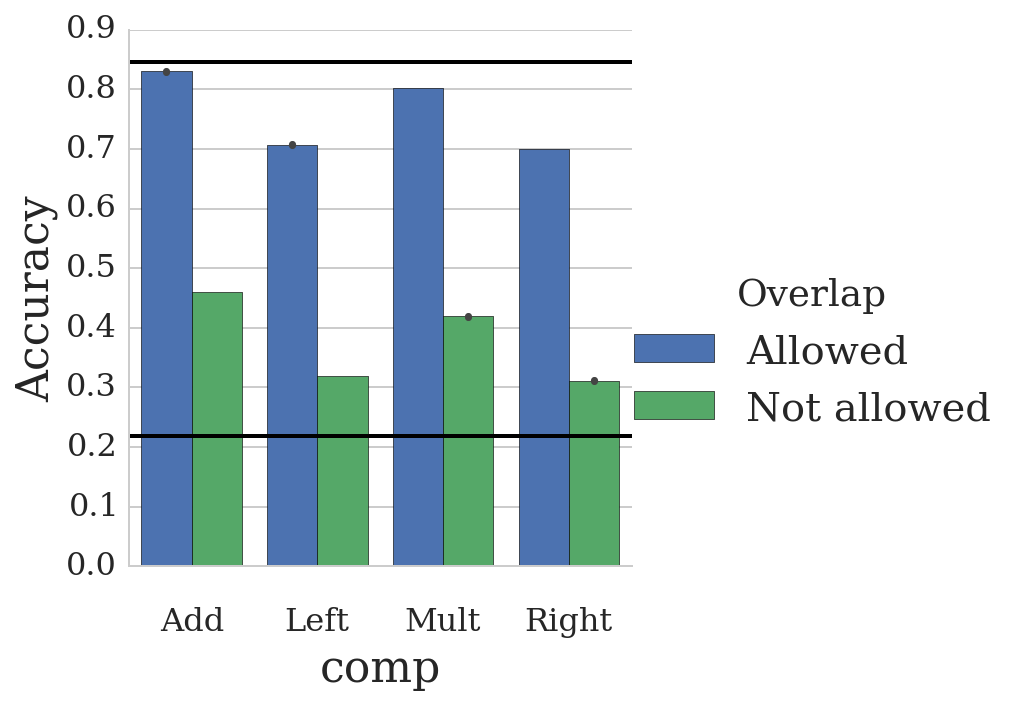

In [37]:
g = sns.factorplot(y='Accuracy', x='comp', hue='Overlap', 
                   hue_order=['Allowed', 'Not allowed'], 
                   data=df, kind='bar');
for ax in g.axes.flat:
    ax.axhline(random_vect_baseline(), c='k');
    ax.axhline(nondistributional_baseline(**settings_of(ids[0])), c='k');
g.savefig('plot-nps-with-lexical-overlap.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)